In [51]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from numpy.polynomial.polynomial import polyfit
from scipy import signal
from scipy.stats import norm

import matplotlib

import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import pyplot
from matplotlib import colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



In [52]:
file_KE_AGRIF_qco_nofilt = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/eNEATL36_1d_KE2.nc')

# file_KE_AGRIF_qco_20 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/KE_filtered_gcmfilter_20.nc')
# file_KE_AGRIF_qco_50 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/KE_filtered_gcmfilter_50.nc')
file_KE_AGRIF_qco_130 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/KE_filtered_gcmfilter_130.nc')


file_KE_TWIN_nofilt = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/eNEATL36_1d_KE2.nc')

# file_KE_TWIN_20 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/KE_filtered_gcmfilter_20.nc')
# file_KE_TWIN_50 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/KE_filtered_gcmfilter_50.nc')
file_KE_TWIN_130 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/KE_filtered_gcmfilter_130.nc')





In [53]:
KE_AGRIF_qco_nofilt = file_KE_AGRIF_qco_nofilt.KE2 *100 *100 *0.5
KE_TWIN_nofilt = file_KE_TWIN_nofilt.KE2  *100 *100 *0.5


# # KE_AGRIF_qco_20 = 0.5*file_KE_AGRIF_qco_20.__xarray_dataarray_variable__.rename('KE2')
# # KE_AGRIF_qco_50 = 0.5*file_KE_AGRIF_qco_50.__xarray_dataarray_variable__.rename('KE2')
KE_AGRIF_qco_130 = file_KE_AGRIF_qco_130.__xarray_dataarray_variable__.rename('KE2')



# # KE_TWIN_20 = 0.5*file_KE_TWIN_20.__xarray_dataarray_variable__.rename('KE2')
# # KE_TWIN_50 = 0.5*file_TWIN_qco_50.__xarray_dataarray_variable__.rename('KE2')
KE_TWIN_130 = file_KE_TWIN_130.__xarray_dataarray_variable__.rename('KE2')



In [54]:
IMIN=220
IMAX=1073
JMIN=350
JMAX=1245


imin_IBI_AGRIF=IMIN
imax_IBI_AGRIF=IMAX
jmin_IBI_AGRIF=JMIN
jmax_IBI_AGRIF=JMAX

KE_AGRIF_qco_nofilt_zoom=KE_AGRIF_qco_nofilt.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_AGRIF_qco_130_zoom = KE_AGRIF_qco_130.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_TWIN_nofilt_zoom=KE_TWIN_nofilt.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_130_zoom = KE_TWIN_130.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]



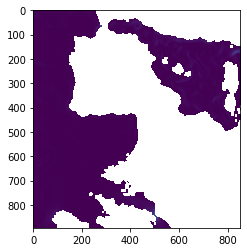

In [55]:
plt.imshow(KE_nofilt_zoom[0,:,:].squeeze())

In [56]:
print(np.nanmean(KE_AGRIF_qco_nofilt_zoom - KE_AGRIF_qco_130_zoom ))
print(np.nanmean(KE_TWIN_nofilt_zoom - KE_TWIN_130_zoom ))

0.9473484134256739
0.42596248580608836


In [57]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkblue","blue","white","red","firebrick"])
darkred = plt.cm.Reds(np.linspace(0.99, 1, 2))
darkblue = plt.cm.YlGnBu(np.linspace(0.99, 1, 2))
bwr_cmap1 = cmap(np.linspace(0, 0.5, 252))
bwr_cmap2 = cmap(np.linspace(0.5, 1, 252))
w_cmap = cmap(np.linspace(0.5, 0.5, 78))
# bwr_cmap2 = plt.cm.(np.linspace(0.5, 1, 126))
# combine them and build a new colormap
colors = np.vstack((darkblue,bwr_cmap1,w_cmap,bwr_cmap2,darkred))
mymap =mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [58]:
KE_filt_AGRIF_qco=np.nanmean(KE_AGRIF_qco_nofilt_zoom - KE_AGRIF_qco_130_zoom ,axis=0)
KE_filt_TWIN=np.nanmean(KE_TWIN_nofilt_zoom - KE_TWIN_130_zoom ,axis=0)



<ipython-input-58-ac234cfcaf01>:1: RuntimeWarning: Mean of empty slice
  KE_filt_AGRIF_qco=np.nanmean(KE_AGRIF_qco_nofilt_zoom - KE_AGRIF_qco_130_zoom ,axis=0)
<ipython-input-58-ac234cfcaf01>:2: RuntimeWarning: Mean of empty slice
  KE_filt_TWIN=np.nanmean(KE_TWIN_nofilt_zoom - KE_TWIN_130_zoom ,axis=0)


/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
<ipython-input-59-0b0d95d587f1>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_son, lat_son ,np.nanmean(KE_AGRIF_qco_130_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')


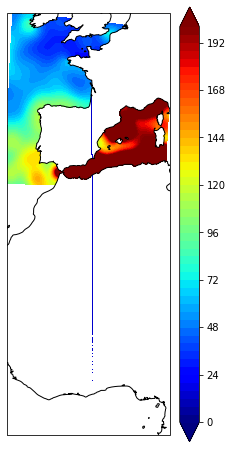

In [59]:
lat_son=file_KE_AGRIF_qco_nofilt.nav_lat.squeeze().values.squeeze()[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
lon_son=file_KE_AGRIF_qco_nofilt.nav_lon.squeeze().values.squeeze()[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
proj=ccrs.Mercator()

plt.figure(figsize=(8,8))
ax = plt.subplot(121, projection=proj)

ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False


im1 = plt.contourf(lon_son, lat_son ,np.nanmean(KE_AGRIF_qco_130_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar()
# plt.close()

<ipython-input-60-f4b637aa7786>:14: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_son, lat_son ,np.nanmean(KE_AGRIF_qco_nofilt_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')


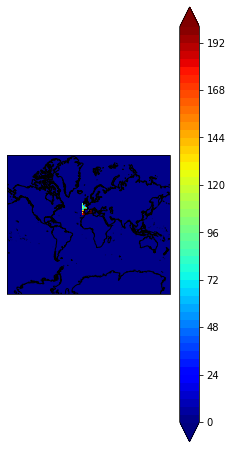

In [60]:
proj=ccrs.Mercator()


plt.figure(figsize=(8,8))
ax = plt.subplot(121, projection=proj)

ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

im1 = plt.contourf(lon_son, lat_son ,np.nanmean(KE_AGRIF_qco_nofilt_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar()

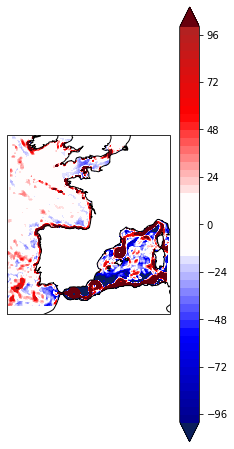

In [64]:

plt.figure(figsize=(8,8))
ax = plt.subplot(121, projection=proj)

ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

im1 = plt.contourf(lon_son, lat_son ,np.nanmean(KE_AGRIF_qco_nofilt_zoom,axis=0), levels=np.linspace(-100,100,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar()